In [38]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import mean_squared_error
    
import mydata
import performance
from performance import PerformanceMeasure, PerformanceEstimation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## CelebA - Efficientnet

In [53]:
db = "CelebA"
root = f"../../dataset/AAAI 2025/{db}/"
df_test_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_test_ef3.csv", True)
df_test_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_test_resnet.csv", True)
df_test_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_test_vgg.csv", True)

In [59]:
from performance import PerformanceOptimisation
po_efficientnet = PerformanceOptimisation(df_test_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_test_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_test_vgg, db, "VGG")

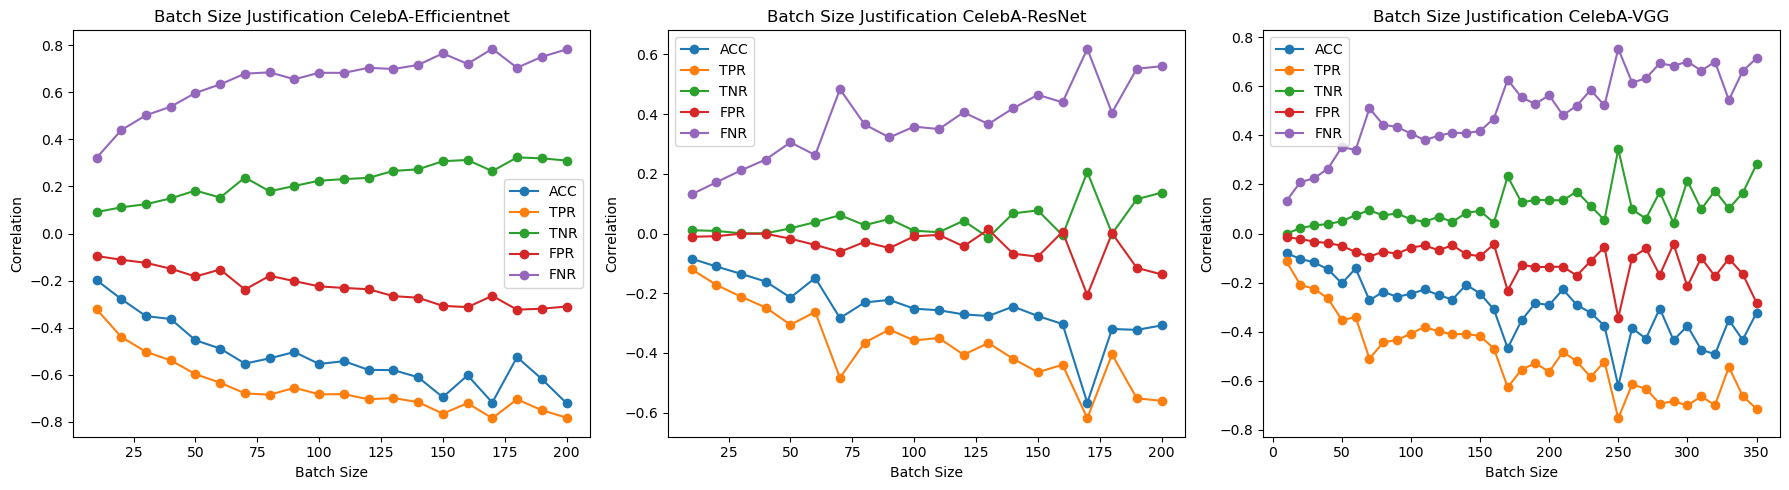

In [62]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [64]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=100)
po_resnet.check_optimal_batch_correlation(batch_size=120)
po_vgg.check_optimal_batch_correlation(batch_size=150)

          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.554606 -0.683397  0.224554 -0.224554  0.683397
ACC      -0.554606  1.000000  0.835060  0.209284 -0.209284 -0.835060
TPR      -0.683397  0.835060  1.000000 -0.322868  0.322868 -1.000000
TNR       0.224554  0.209284 -0.322868  1.000000 -1.000000  0.322868
FPR      -0.224554 -0.209284  0.322868 -1.000000  1.000000 -0.322868
FNR       0.683397 -0.835060 -1.000000  0.322868 -0.322868  1.000000
          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.270814 -0.405855  0.042862 -0.042862  0.405855
ACC      -0.270814  1.000000  0.803479  0.216234 -0.216234 -0.803479
TPR      -0.405855  0.803479  1.000000 -0.291655  0.291655 -1.000000
TNR       0.042862  0.216234 -0.291655  1.000000 -1.000000  0.291655
FPR      -0.042862 -0.216234  0.291655 -1.000000  1.000000 -0.291655
FNR       0.405855 -0.803479 -1.000000  0.291655 -0.291655  1.000000
          distance       ACC      

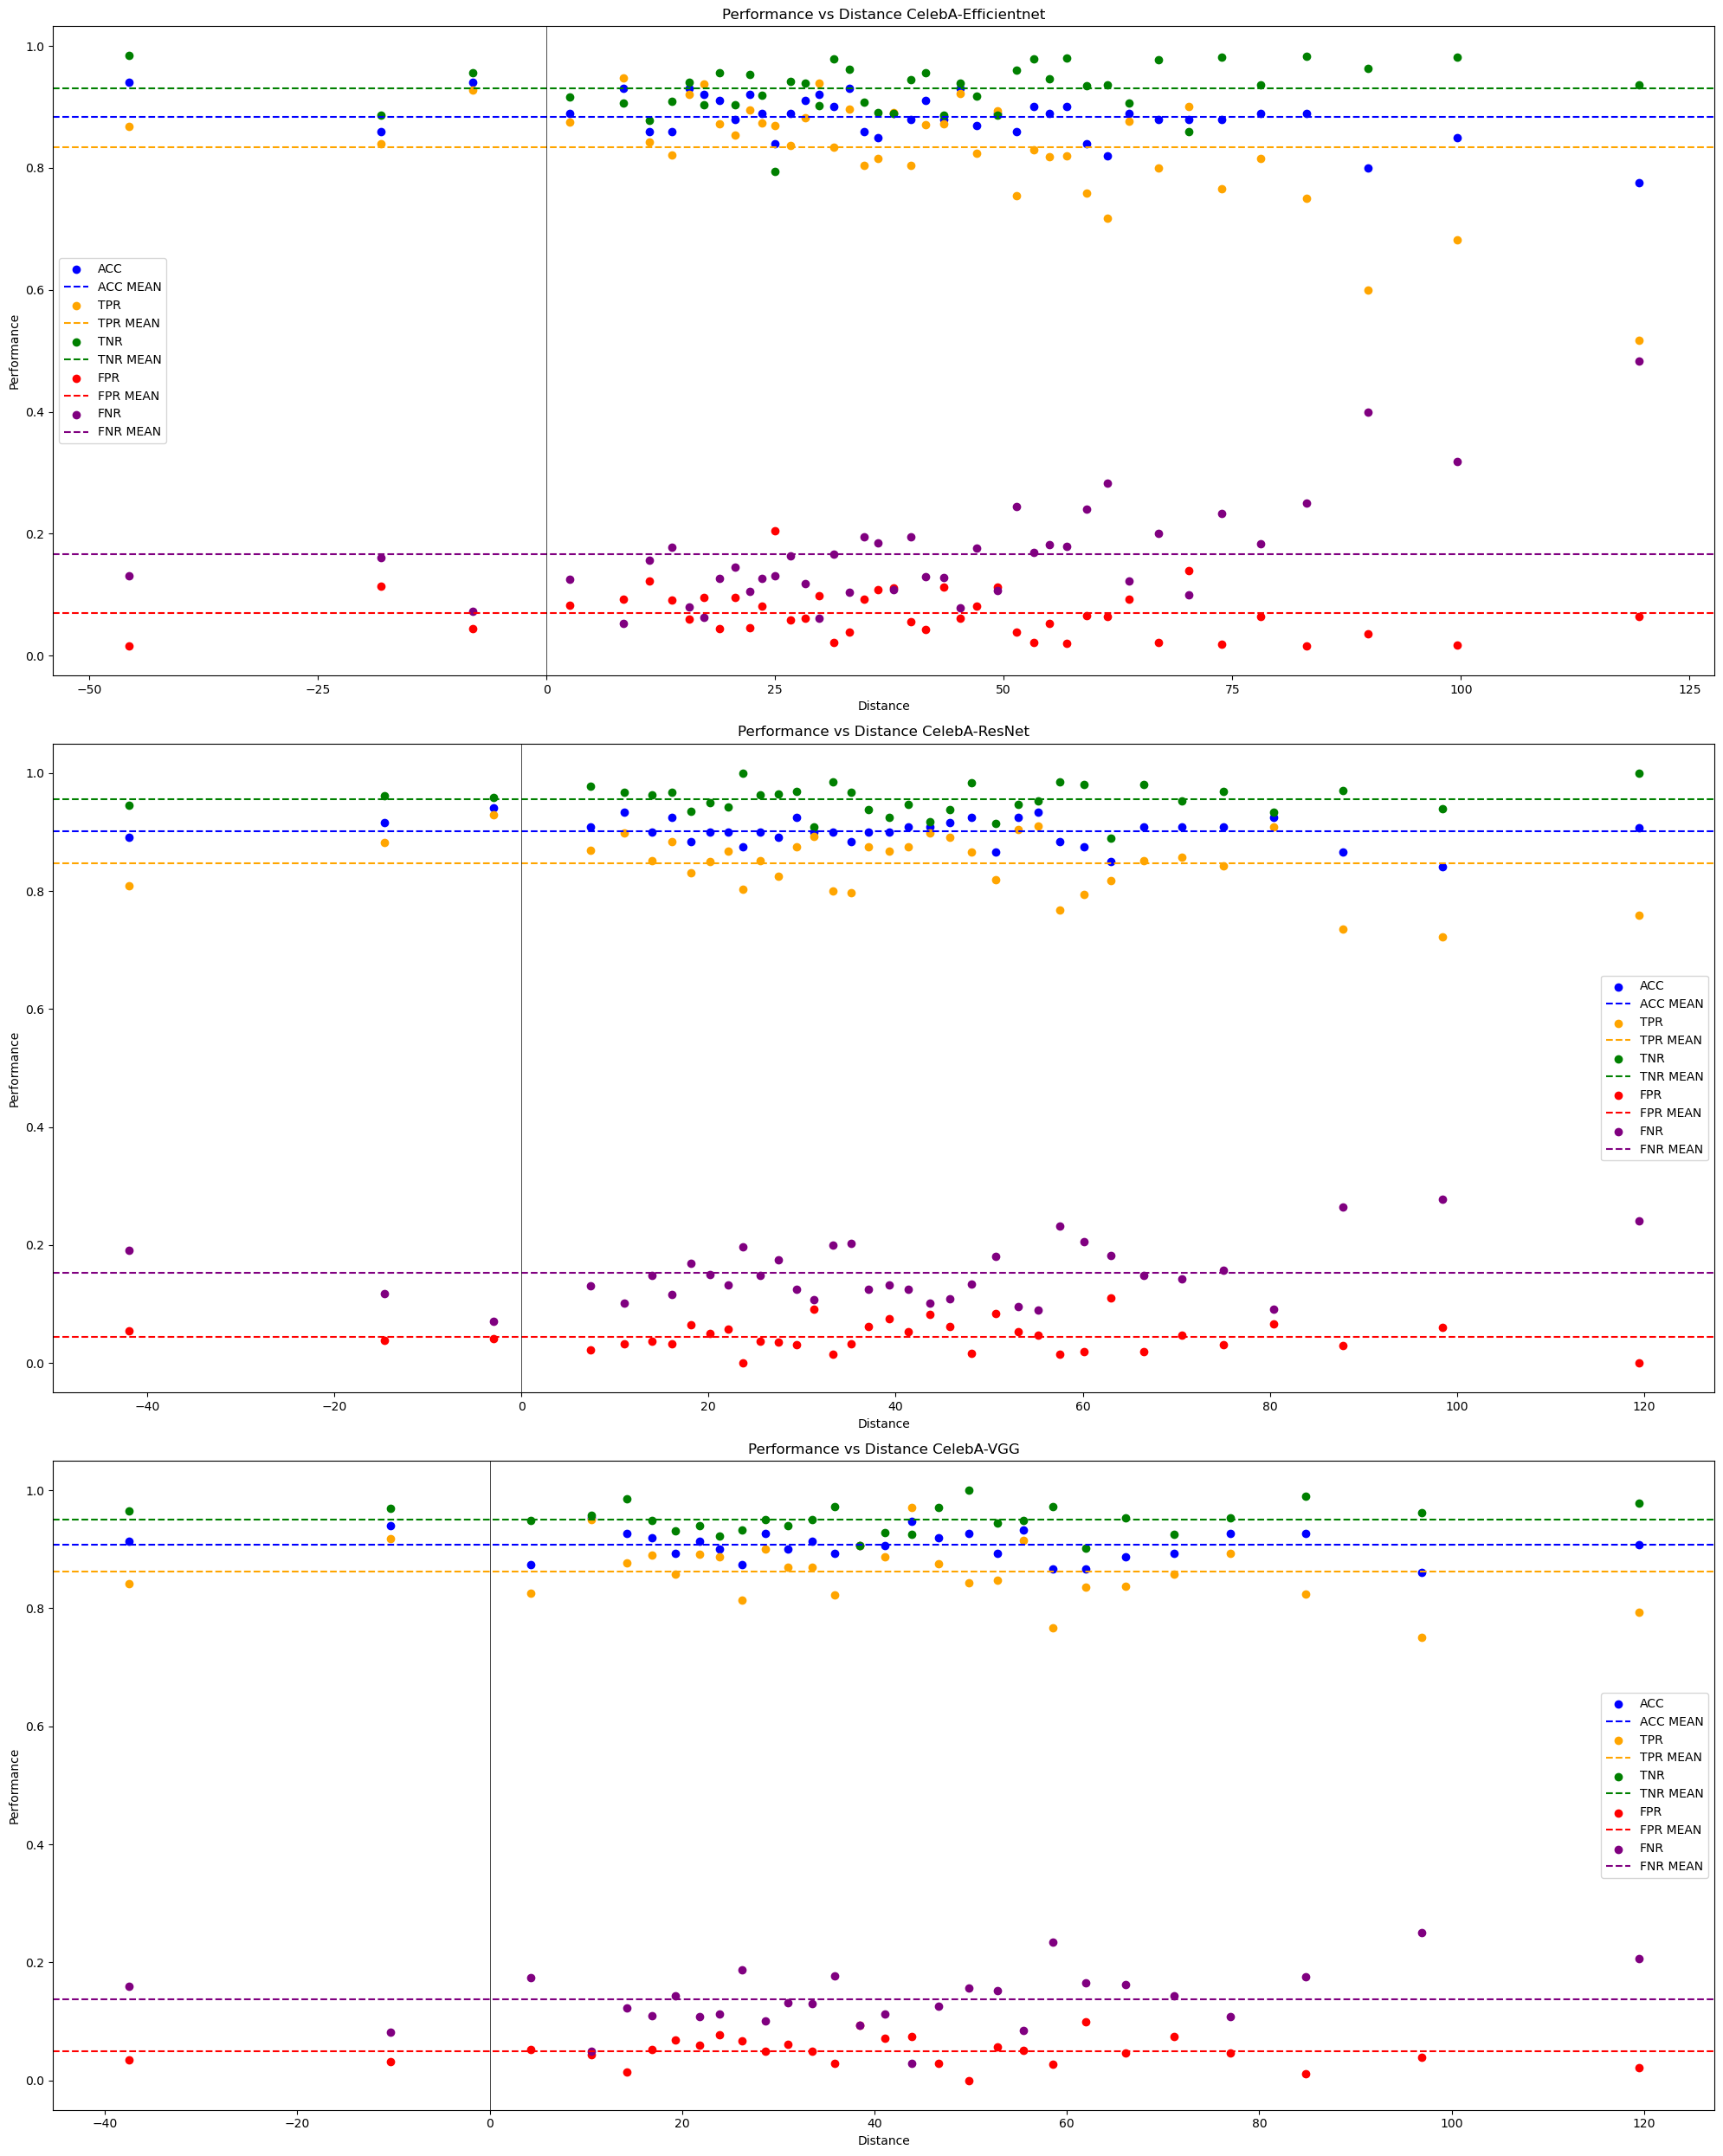

In [73]:
fig, ax = plt.subplots(3, 1, figsize=(20, 25))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()

CelebA - Efficientnet
Degree 1: MSE = 0.003859169314346911
Degree 2: MSE = 0.0023828487699369717
Degree 3: MSE = 0.0023083372112772285
Degree 4: MSE = 0.0023046491560052753
Degree 5: MSE = 0.002303923597765423
CelebA - ResNet
Degree 1: MSE = 0.002074932887981598
Degree 2: MSE = 0.0017459730650439716
Degree 3: MSE = 0.0017444723000211463
Degree 4: MSE = 0.001730017648795167
Degree 5: MSE = 0.0014692837785834272
CelebA - VGG
Degree 1: MSE = 0.0019621215985861844
Degree 2: MSE = 0.0017184086922084338
Degree 3: MSE = 0.001696647145120928
Degree 4: MSE = 0.0016944003605903336
Degree 5: MSE = 0.0016063286661416201


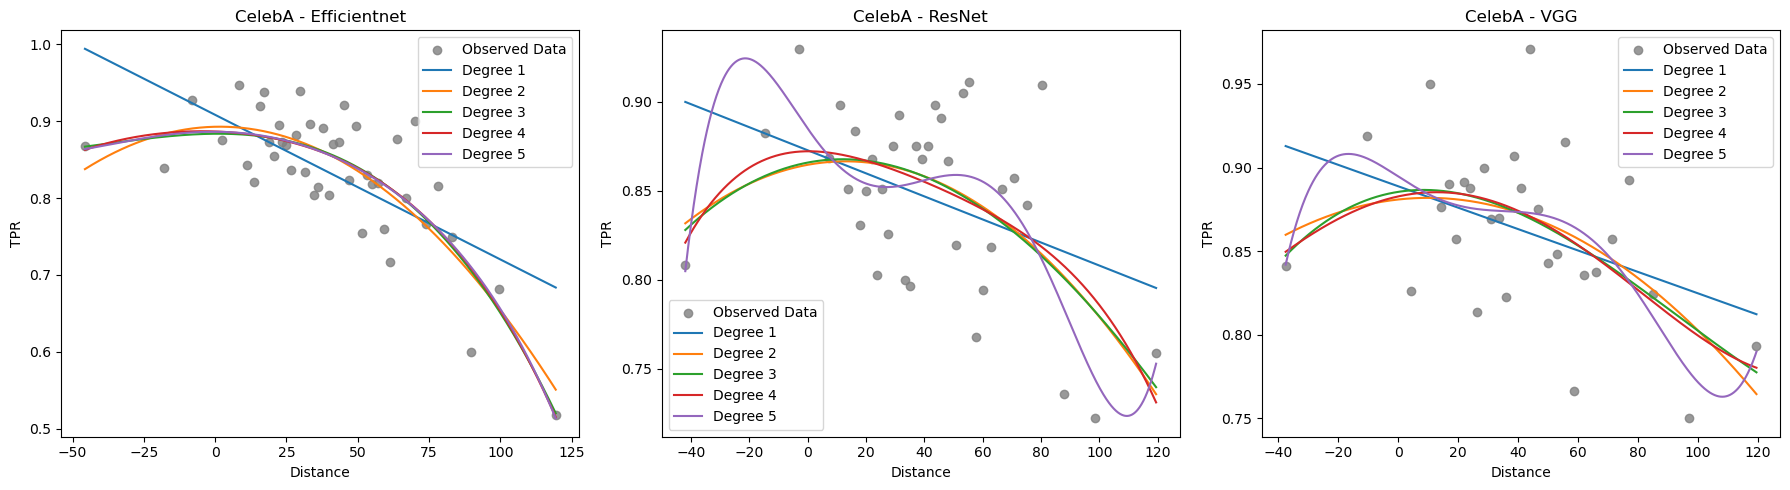

In [76]:
metric = "TPR" # Focus metric for penalty
degrees = [1, 2, 3, 4, 5]

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
po_efficientnet.check_optimised_degree(metric, degrees, ax[0])
po_resnet.check_optimised_degree(metric, degrees, ax[1])
po_vgg.check_optimised_degree(metric, degrees, ax[2])

plt.tight_layout()
plt.show()

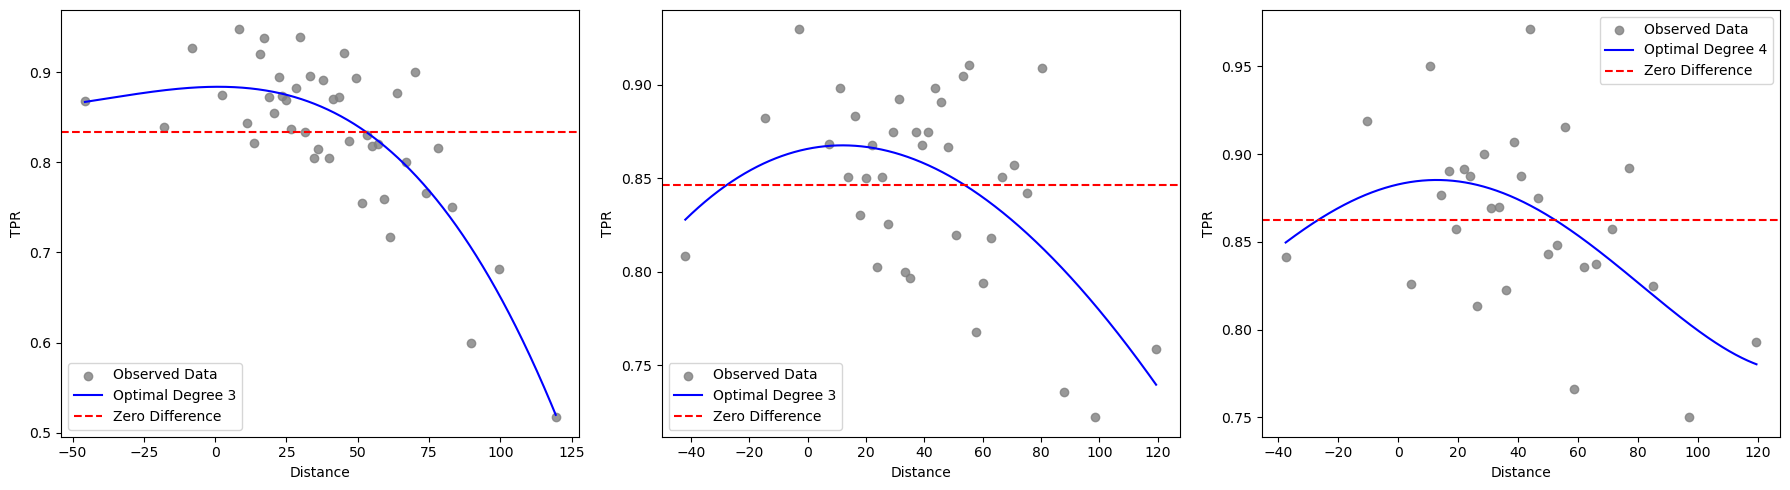

In [77]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

optimal_deg = 3
po_efficientnet.diaplay_optimal_degree(metric, optimal_deg, ax[0])

optimal_deg = 3
p = po_resnet.diaplay_optimal_degree(metric, optimal_deg, ax[1])

optimal_deg = 4
po_vgg.diaplay_optimal_degree(metric, optimal_deg, ax[2])

plt.tight_layout()
plt.show()

In [81]:
polynomial_save_file = f"{root}model/pickle/polynomial_model_ef3.pkl"
po_efficientnet.save_optimal_polynomial_model(polynomial_save_file)

polynomial_save_file = f"{root}model/pickle/polynomial_model_resnet.pkl"
po_resnet.save_optimal_polynomial_model(polynomial_save_file)

polynomial_save_file = f"{root}model/pickle/polynomial_model_vgg.pkl"
po_vgg.save_optimal_polynomial_model(polynomial_save_file)

Modle saved
Modle saved
Modle saved
